# Installation des dépendances


In [1]:
!pip install ultralytics easyocr opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.

In [2]:
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-ara
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ara
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 645 kB of archives.
After this operation, 1,447 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ara all 1:4.00~git30-7274cfa-1.1 [645 kB]
Fetched 645 kB in 1s (555 kB/s)
Selecting previously unselected package tesseract-ocr-ara.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-ara_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-ara (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-ar

# importer les bibliotheques

In [3]:
from google.colab import drive
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from ultralytics import YOLO
import easyocr
import pytesseract
import re

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# chragement modele detection

In [4]:
model_path = '/content/best_finetuned.pt'

In [5]:
detection_model = YOLO(model_path)
print("Modèle YOLO chargé avec succès.")

Modèle YOLO chargé avec succès.



0: 416x640 1 Id, 1 dob, 2 first_names, 1 full_name, 1 last_name, 1 pob, 20.5ms
Speed: 7.9ms preprocess, 20.5ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 640)


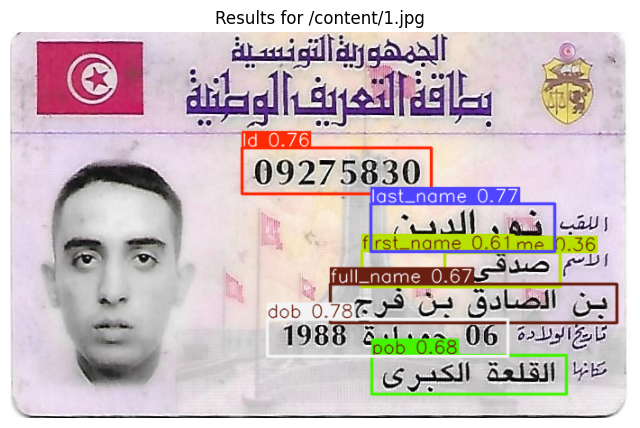


0: 640x640 2 addresss, 1 issue_date, 1 mother_name, 1 profession, 14.5ms
Speed: 3.1ms preprocess, 14.5ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


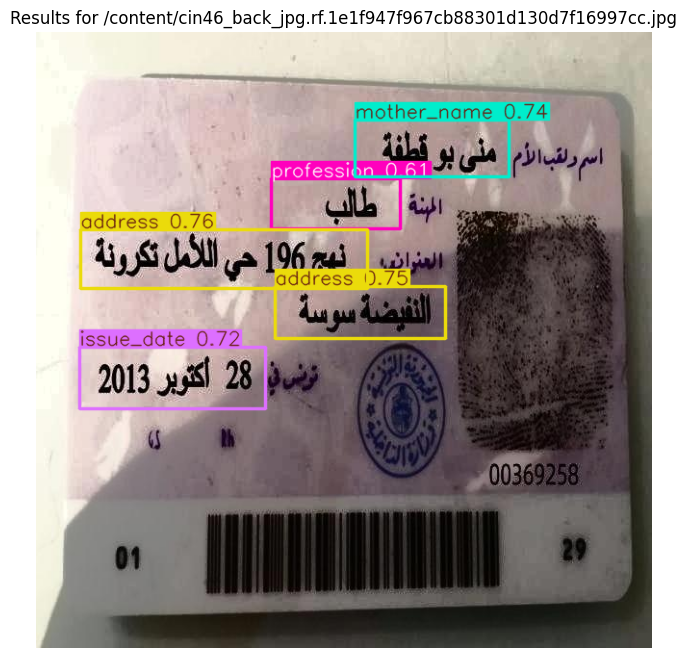

In [8]:
# Liste des chemins des trois images
image_paths = ['/content/1.jpg', '/content/cin46_back_jpg.rf.1e1f947f967cb88301d130d7f16997cc.jpg']  # Remplacer par les chemins réels

# Charger et traiter chaque image
for image_path in image_paths:
    # Charger l'image avec PIL
    image = Image.open(image_path)

    # Convertir l'image en tableau NumPy (compatible avec YOLO)
    image_np = np.array(image)

    # Passer l'image au modèle YOLO pour la détection
    results = detection_model(image_np)

    # Afficher l'image avec les résultats de détection
    plt.figure(figsize=(8, 8))  # Ajuster la taille de l'image pour un meilleur affichage
    plt.imshow(results[0].plot())  # Afficher l'image avec les boîtes de détection
    plt.title(f"Results for {image_path}")  # Ajouter un titre avec le nom de l'image
    plt.axis('off')  # Supprimer les axes
    plt.show()



#  OCR

### extraction des champs

In [10]:
def extract_fields(results, image_np):
    """
    Extrait les champs en gérant les détections multiples et les cas spéciaux
    """
    extracted_fields = {}
    boxes = results[0].boxes

    # Dictionnaire pour stocker les scores de confiance par type de base
    confidence_by_type = {}
    # Dictionnaire pour stocker les parties d'adresseَ
    address_parts = []

    for box in boxes:
        cls_id = int(box.cls[0].item())
        cls_name = results[0].names[cls_id]
        confidence = float(box.conf[0].item())
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
        roi = image_np[y1:y2, x1:x2]

        # Extraire le type de base (avant le numéro)
        base_type = cls_name.split('_')[0]

        # Cas spécial pour l'adresse
        if base_type == 'address':
            address_parts.append({
                'roi': roi,
                'confidence': confidence,
                'bbox': (x1, y1, x2, y2)
            })
            continue

        # Pour les autres champs, garder celui avec la meilleure confiance
        field_key = base_type + '_name' if base_type in ['first', 'last', 'full', 'mother'] else base_type

        if field_key not in confidence_by_type or confidence > confidence_by_type[field_key]:
            extracted_fields[field_key] = {
                'roi': roi,
                'confidence': confidence,
                'bbox': (x1, y1, x2, y2)
            }
            confidence_by_type[field_key] = confidence

    # Traitement spécial pour l'adresse si des parties ont été détectées
    if address_parts:
        if len(address_parts) > 1:
            # Trier les parties d'adresse de gauche à droite
            address_parts.sort(key=lambda x: x['bbox'][0])

            # Calculer les dimensions de la boîte englobante
            min_x = min(part['bbox'][0] for part in address_parts)
            min_y = min(part['bbox'][1] for part in address_parts)
            max_x = max(part['bbox'][2] for part in address_parts)
            max_y = max(part['bbox'][3] for part in address_parts)

            # Extraire la ROI complète
            full_roi = image_np[min_y:max_y, min_x:max_x]

            # Calculer la confiance moyenne
            avg_confidence = sum(part['confidence'] for part in address_parts) / len(address_parts)

            # Stocker l'adresse complète
            extracted_fields['address'] = {
                'roi': full_roi,
                'confidence': avg_confidence,
                'bbox': (min_x, min_y, max_x, max_y)
            }
        else:
            # S'il n'y a qu'une partie, la stocker directement
            extracted_fields['address'] = address_parts[0]

    return extracted_fields

##### test


Traitement de la CIN - Côté Front
--------------------------------------------------

0: 416x640 1 Id, 1 dob, 1 first_name, 2 full_names, 1 last_name, 1 pob, 7.2ms
Speed: 2.8ms preprocess, 7.2ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 640)


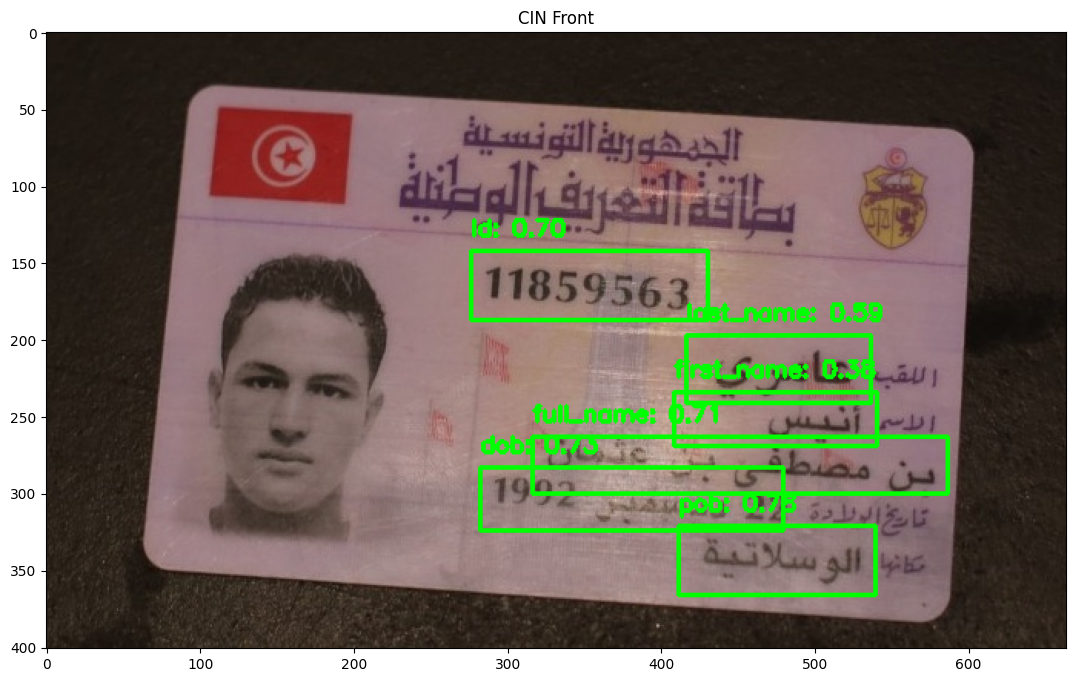

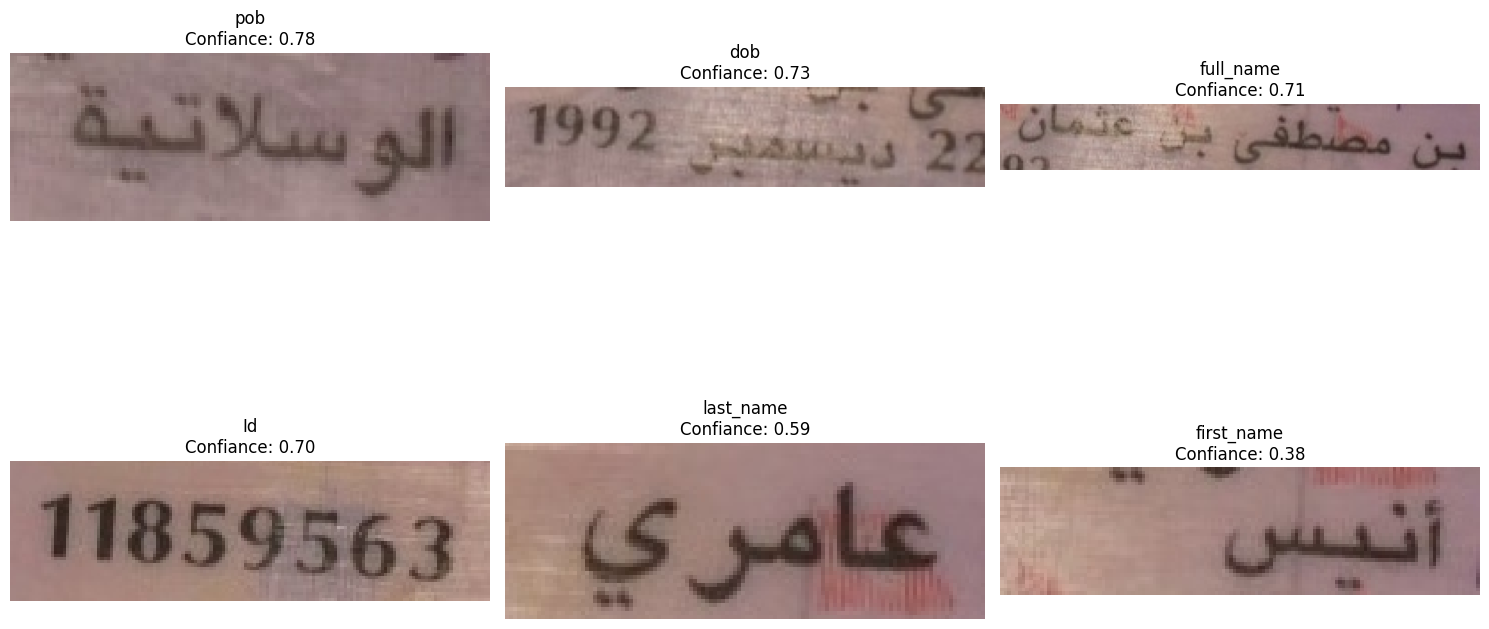


Champs détectés (Front):
- pob (confiance: 0.78)
- dob (confiance: 0.73)
- full_name (confiance: 0.71)
- Id (confiance: 0.70)
- last_name (confiance: 0.59)
- first_name (confiance: 0.38)

Traitement de la CIN - Côté Back
--------------------------------------------------

0: 640x640 2 addresss, 1 issue_date, 1 mother_name, 2 professions, 11.5ms
Speed: 3.3ms preprocess, 11.5ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


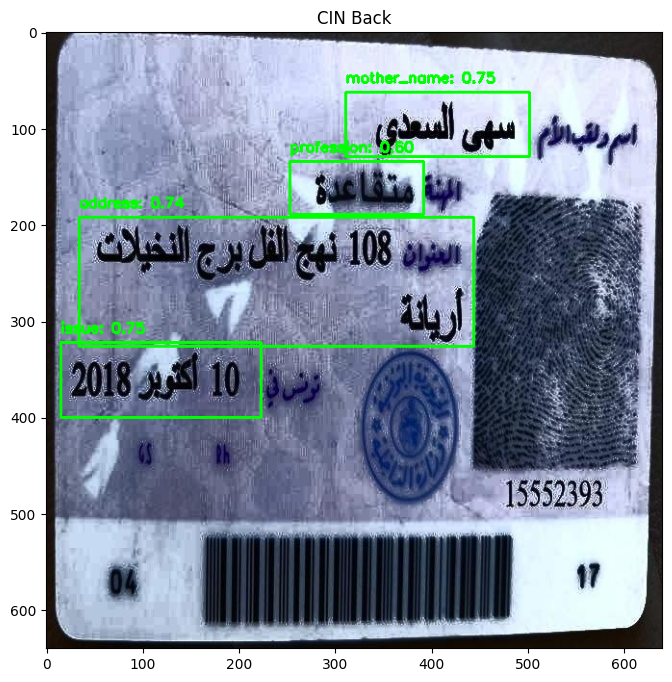

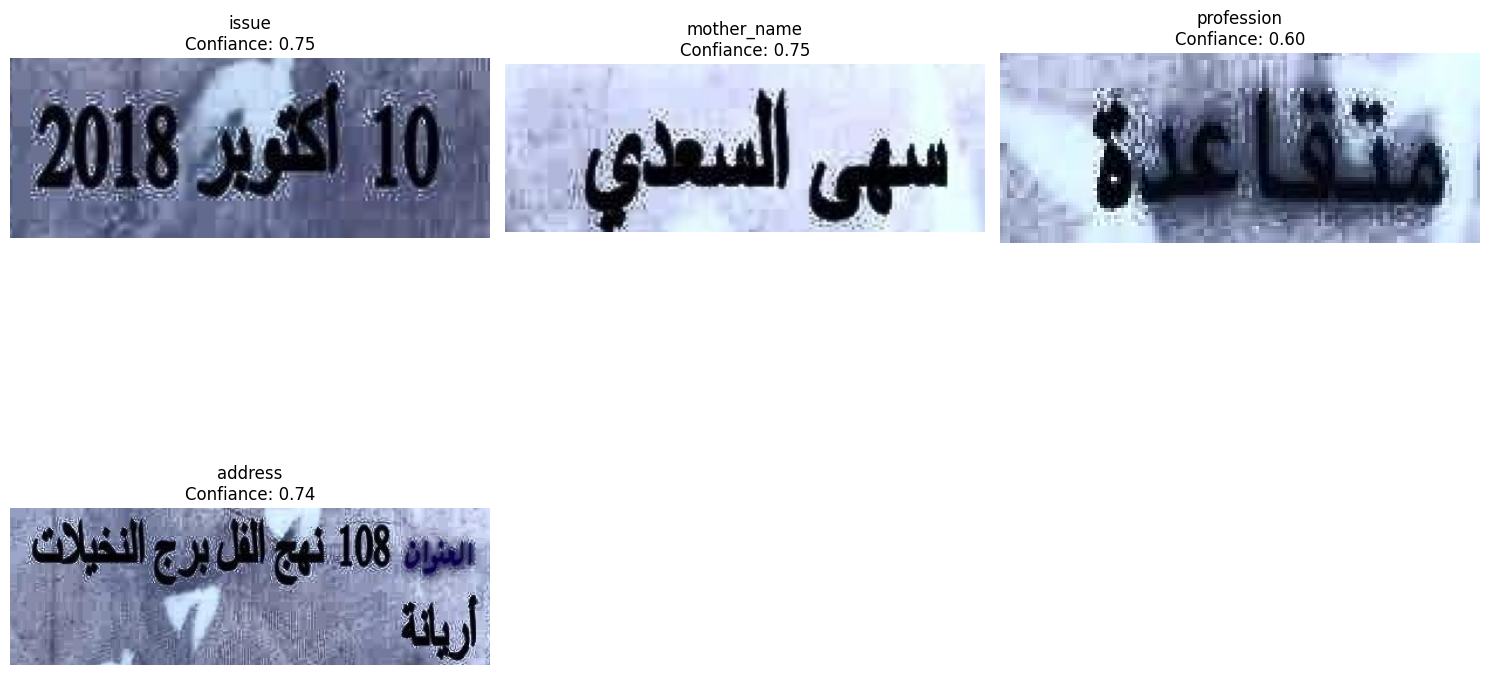


Champs détectés (Back):
- issue (confiance: 0.75)
- mother_name (confiance: 0.75)
- profession (confiance: 0.60)
- address (confiance: 0.74)


In [11]:
def visualize_extracted_fields(image_np, extracted_fields, image_name="Image"):
    """Visualiser les régions extraites"""
    # Créer une copie de l'image pour le dessin
    image_with_boxes = image_np.copy()

    # Pour chaque champ extrait
    for field_name, field_info in extracted_fields.items():
        # Récupérer les coordonnées
        x1, y1, x2, y2 = field_info['bbox']

        # Dessiner le rectangle
        cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Ajouter le nom de la classe et le score
        label = f"{field_name}: {field_info['confidence']:.2f}"
        cv2.putText(image_with_boxes, label, (x1, y1-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Afficher l'image originale avec les boîtes
    plt.figure(figsize=(15, 8))
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(f"{image_name}")
    plt.show()

    # Créer une figure avec des sous-plots pour les ROIs
    n_fields = len(extracted_fields)
    if n_fields > 0:
        n_cols = min(3, n_fields)  # Maximum 3 colonnes
        n_rows = (n_fields + n_cols - 1) // n_cols

        plt.figure(figsize=(15, 5*n_rows))
        for idx, (field_name, field_info) in enumerate(extracted_fields.items(), 1):
            plt.subplot(n_rows, n_cols, idx)
            plt.imshow(cv2.cvtColor(field_info['roi'], cv2.COLOR_BGR2RGB))
            plt.title(f"{field_name}\nConfiance: {field_info['confidence']:.2f}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()

def process_cin_image(image_path, side="Front"):
    """Traiter une image de CIN (front ou back)"""
    # Charger l'image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Erreur: Impossible de charger l'image {image_path}")
        return

    # Faire la détection avec le modèle
    results = detection_model(image)

    # Extraire les champs
    extracted_fields = extract_fields(results, image)

    # Visualiser les résultats
    visualize_extracted_fields(image, extracted_fields, f"CIN {side}")

    return extracted_fields

# Liste des images à tester avec leur type
image_data = [
    {"path": "/content/9.jpg", "side": "Front"},
    {"path": "/content/cin41_back_jpg.rf.369fff38426c3d37541d29accebe5ed9.jpg", "side": "Back"}
]

# Stocker les résultats pour les deux côtés
cin_data = {}

# Traiter chaque image
for img_info in image_data:
    print(f"\nTraitement de la CIN - Côté {img_info['side']}")
    print("-" * 50)

    extracted_fields = process_cin_image(img_info["path"], img_info["side"])
    cin_data[img_info["side"]] = extracted_fields

    # Afficher un résumé des champs détectés
    print(f"\nChamps détectés ({img_info['side']}):")
    for field_name, field_info in extracted_fields.items():
        print(f"- {field_name} (confiance: {field_info['confidence']:.2f})")

### pretraitement


In [12]:
def preprocess_field(roi, field_type):
    """
    Prétraitement spécifique pour chaque type de champ

    Args:
        roi: Image de la région d'intérêt
        field_type: Type du champ (first_name, dob, address, etc.)

    Returns:
        np.array: Image prétraitée
    """
    # Conversion en niveaux de gris
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY) if len(roi.shape) == 3 else roi

    # Initialisation de processed
    processed = gray.copy()

    if field_type.lower() in ['first_name', 'last_name', 'mother_name']:
        # Paramètres optimaux pour le texte arabe
        clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
        processed = clahe.apply(gray)
        processed = cv2.fastNlMeansDenoising(processed)
        _, processed = cv2.threshold(processed, 0, 255,
                                  cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        # Dilatation minimale
        kernel = np.ones((2,2), np.uint8)
        processed = cv2.dilate(processed, kernel, iterations=1)

    elif field_type.lower() == 'id':
        # Traitement simple pour les chiffres
        processed = cv2.GaussianBlur(gray, (3, 3), 0)
        _, processed = cv2.threshold(processed, 0, 255,
                                  cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    elif field_type.lower() == 'dob':
        # Optimisé pour les dates
        clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8, 8))
        processed = clahe.apply(gray)
        processed = cv2.fastNlMeansDenoising(processed)
        _, processed = cv2.threshold(processed, 0, 255,
                                  cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    elif field_type.lower() in ['pob', 'full_name']:
        # Nouveau traitement optimisé pour le lieu de naissance
        # 1. Amélioration du contraste
        clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8, 8))
        contrast_enhanced = clahe.apply(gray)

        # 2. Débruitage plus agressif
        denoised = cv2.fastNlMeansDenoising(contrast_enhanced, h=15)

        # 3. Binarisation avec Otsu au lieu du seuillage adaptatif
        _, binary = cv2.threshold(denoised, 0, 255,
                                cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 4. Nettoyage morphologique
        kernel = np.ones((2,2), np.uint8)
        processed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

    elif field_type.lower() == 'address':
        # Traitement pour l'adresse
        clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8, 8))
        processed = clahe.apply(gray)
        processed = cv2.fastNlMeansDenoising(processed)
        _, processed = cv2.threshold(processed, 0, 255,
                                  cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    else:
        # Traitement par défaut
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        processed = clahe.apply(gray)
        _, processed = cv2.threshold(processed, 0, 255,
                                  cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Redimensionnement final modéré
    height, width = processed.shape
    scale_factor = 2
    processed = cv2.resize(processed, (width*scale_factor, height*scale_factor),
                         interpolation=cv2.INTER_CUBIC)

    # Ajout d'une bordure blanche
    processed = cv2.copyMakeBorder(processed, 10, 10, 10, 10,
                                 cv2.BORDER_CONSTANT,
                                 value=[255, 255, 255])

    return processed



#### Test



0: 320x640 1 Id, 1 dob, 2 first_names, 1 full_name, 1 last_name, 1 pob, 36.9ms
Speed: 3.3ms preprocess, 36.9ms inference, 1.7ms postprocess per image at shape (1, 3, 320, 640)

Prétraitement pour: last_name
----------------------------------------


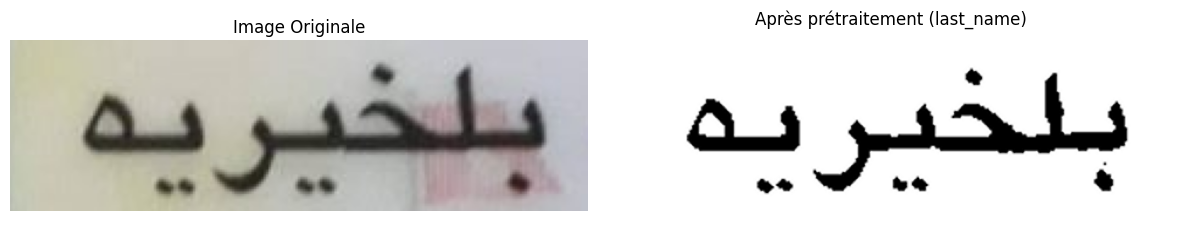


Prétraitement pour: pob
----------------------------------------


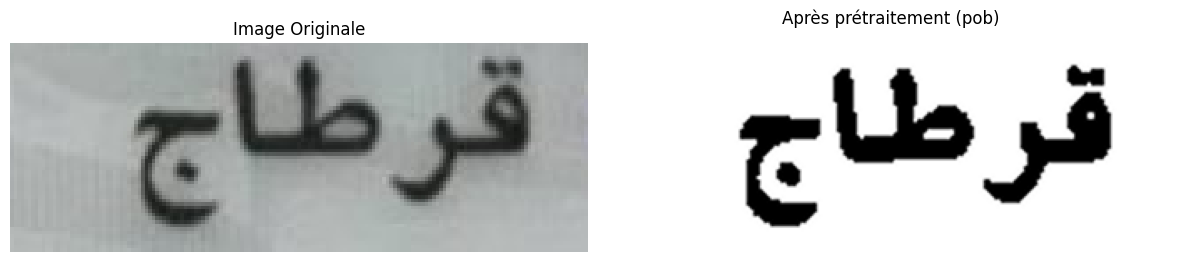


Prétraitement pour: full_name
----------------------------------------


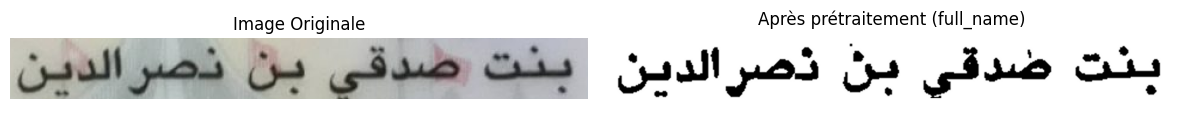


Prétraitement pour: Id
----------------------------------------


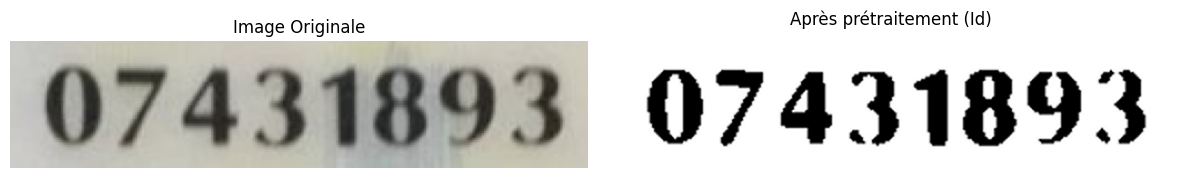


Prétraitement pour: dob
----------------------------------------


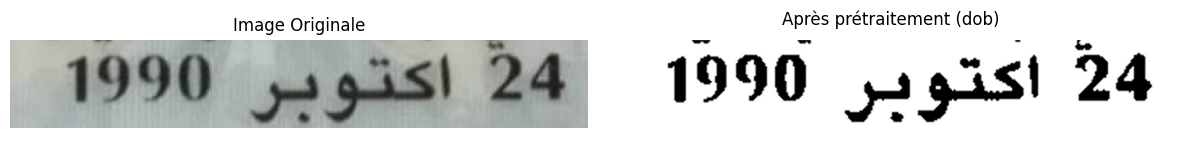


Prétraitement pour: first_name
----------------------------------------


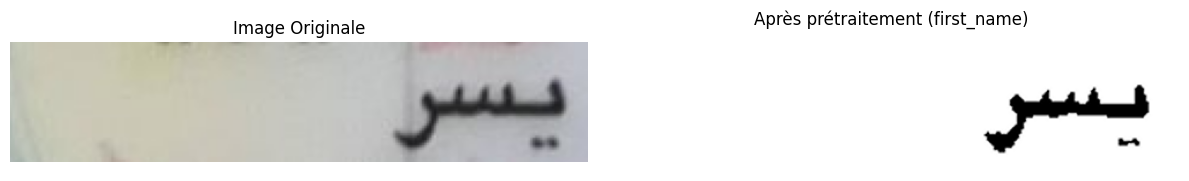

In [13]:
# === TEST DU PRÉTRAITEMENT ===
"""
Visualisation des résultats du prétraitement pour différents types de champs
"""

def visualize_preprocessing(roi, field_type):
    """
    Visualise l'image avant et après prétraitement

    Args:
        roi: Image d'origine
        field_type: Type du champ pour le prétraitement
    """
    # Prétraitement de l'image
    processed = preprocess_field(roi, field_type)

    # Création de la figure avec 2 sous-plots
    plt.figure(figsize=(12, 4))

    # Image originale
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title('Image Originale')
    plt.axis('off')

    # Image prétraitée
    plt.subplot(1, 2, 2)
    plt.imshow(processed, cmap='gray')
    plt.title(f'Après prétraitement ({field_type})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Test sur une image
image_path = "/content/3.jpg"
image = cv2.imread(image_path)
results = detection_model(image)
extracted_fields = extract_fields(results, image)

# Tester le prétraitement sur différents types de champs
for field_name, field_info in extracted_fields.items():
    print(f"\nPrétraitement pour: {field_name}")
    print("-" * 40)
    visualize_preprocessing(field_info['roi'], field_name)

### performing OCR

### teserract


In [14]:
def perform_ocr(preprocessed_image, field_type):
    import pytesseract
    import re

    try:
        # 1. ID
        if field_type == 'id':
            scale = 3
            configs = [
                '--psm 7 -l eng --oem 1 -c tessedit_char_whitelist=0123456789',
                '--psm 6 -l eng --oem 1 -c tessedit_char_whitelist=0123456789'
            ]

            height, width = preprocessed_image.shape
            enlarged = cv2.resize(preprocessed_image, (width*scale, height*scale),
                                interpolation=cv2.INTER_CUBIC)

            # Plus de débruitage pour les chiffres
            denoised = cv2.fastNlMeansDenoising(enlarged, None, 10, 7, 21)
            _, binary = cv2.threshold(denoised, 0, 255,
                                   cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            images_to_try = [('Binary', binary)]

        # 2. LAST_NAME
        elif field_type == 'last_name':
            scale = 4
            configs = [
                '--psm 7 -l ara --dpi 300 --oem 1',
                '--psm 6 -l ara --dpi 300 --oem 1'
            ]

            height, width = preprocessed_image.shape
            enlarged = cv2.resize(preprocessed_image, (width*scale, height*scale),
                                interpolation=cv2.INTER_CUBIC)

            clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
            enhanced = clahe.apply(enlarged)

            _, binary = cv2.threshold(enhanced, 0, 255,
                                   cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            images_to_try = [
                ('Enhanced', enhanced),
                ('Binary', binary)
            ]

        # 3. DOB
        elif field_type == 'dob':
            scale = 3
            configs = [
                '--psm 6 -l ara+eng --oem 1',
                '--psm 7 -l ara+eng --oem 1'
            ]

            height, width = preprocessed_image.shape
            enlarged = cv2.resize(preprocessed_image, (width*scale, height*scale),
                                interpolation=cv2.INTER_CUBIC)

            clahe = cv2.createCLAHE(clipLimit=2.5, tileGridSize=(8,8))
            enhanced = clahe.apply(enlarged)

            binary = cv2.adaptiveThreshold(enhanced, 255,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY, 11, 2)

            kernel = np.ones((2,2), np.uint8)
            dilated = cv2.dilate(binary, kernel, iterations=1)

            images_to_try = [
                ('Enhanced', enhanced),
                ('Dilated', dilated)
            ]

        # 4. POB
        elif field_type == 'pob':
            scale = 4
            configs = [
                '--psm 7 -l ara --dpi 300 --oem 1',
                '--psm 6 -l ara --dpi 300 --oem 1'
            ]

            height, width = preprocessed_image.shape
            enlarged = cv2.resize(preprocessed_image, (width*scale, height*scale),
                                interpolation=cv2.INTER_CUBIC)

            clahe = cv2.createCLAHE(clipLimit=3.5, tileGridSize=(8,8))
            enhanced = clahe.apply(enlarged)

            _, binary = cv2.threshold(enhanced, 0, 255,
                                   cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            kernel = np.ones((2,2), np.uint8)
            dilated = cv2.dilate(binary, kernel, iterations=1)

            images_to_try = [
                ('Enhanced', enhanced),
                ('Dilated', dilated)
            ]

        # 5. FULL_NAME
        elif field_type == 'full_name':
            scale = 4
            configs = [
                '--psm 7 -l ara --dpi 300 --oem 1',
                '--psm 6 -l ara --dpi 300 --oem 1'
            ]

            height, width = preprocessed_image.shape
            enlarged = cv2.resize(preprocessed_image, (width*scale, height*scale),
                                interpolation=cv2.INTER_CUBIC)

            clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
            enhanced = clahe.apply(enlarged)

            _, binary = cv2.threshold(enhanced, 0, 255,
                                   cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            images_to_try = [
                ('Enhanced', enhanced),
                ('Binary', binary)
            ]

        # 6. FIRST_NAME
        elif field_type == 'first_name':
            scale = 4
            configs = [
                '--psm 8 -l ara --dpi 300 --oem 1',
                '--psm 7 -l ara --dpi 300 --oem 1'
            ]

            height, width = preprocessed_image.shape
            enlarged = cv2.resize(preprocessed_image, (width*scale, height*scale),
                                interpolation=cv2.INTER_CUBIC)

            clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
            enhanced = clahe.apply(enlarged)

            _, binary = cv2.threshold(enhanced, 0, 255,
                                   cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            images_to_try = [
                ('Enhanced', enhanced),
                ('Binary', binary)
            ]

        else:
            return None

        # OCR et nettoyage
        all_results = []

        for img_name, img in images_to_try:
            print(f"\nEssai avec {img_name}:")

            img_with_border = cv2.copyMakeBorder(
                img, 50, 50, 50, 50,
                cv2.BORDER_CONSTANT,
                value=[255, 255, 255]
            )

            for config in configs:
                print(f"Config: {config}")

                cv2.imwrite('temp_ocr.png', img_with_border)
                text = pytesseract.image_to_string('temp_ocr.png', config=config)
                text = text.strip()

                if text:
                    # Nettoyage spécifique selon le type
                    if field_type == 'id':
                        text = ''.join(filter(str.isdigit, text))
                    elif field_type == 'dob':
                        text = re.sub(r'[^؀-ۿ0-9\s]', '', text)
                    else:
                        text = re.sub(r'[^؀-ۿ\s]', '', text)

                    if text and len(text) >= 2:
                        print(f"Résultat nettoyé: {repr(text)}")
                        all_results.append(text)

        if all_results:
            from collections import Counter
            results_count = Counter(all_results)

            if field_type == 'id':
                final_text = max(all_results, key=len)
            else:
                final_text = results_count.most_common(1)[0][0]

            print(f"\nRésultat final: {repr(final_text)}")
            return final_text

        return None

    except Exception as e:
        print(f"Erreur: {str(e)}")
        return None

#### Test


0: 416x640 1 Id, 1 dob, 2 first_names, 1 full_name, 1 last_name, 1 pob, 12.0ms
Speed: 3.1ms preprocess, 12.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)

Test OCR: dob

Essai avec Enhanced:
Config: --psm 6 -l ara+eng --oem 1
Résultat nettoyé: '6 جويلبة 1988'
Config: --psm 7 -l ara+eng --oem 1
Résultat nettoyé: '6 جويلبة 1988'

Essai avec Dilated:
Config: --psm 6 -l ara+eng --oem 1
Résultat nettoyé: '6 حويلية 1988'
Config: --psm 7 -l ara+eng --oem 1
Résultat nettoyé: '6 حوينية 1988'

Résultat final: '6 جويلبة 1988'


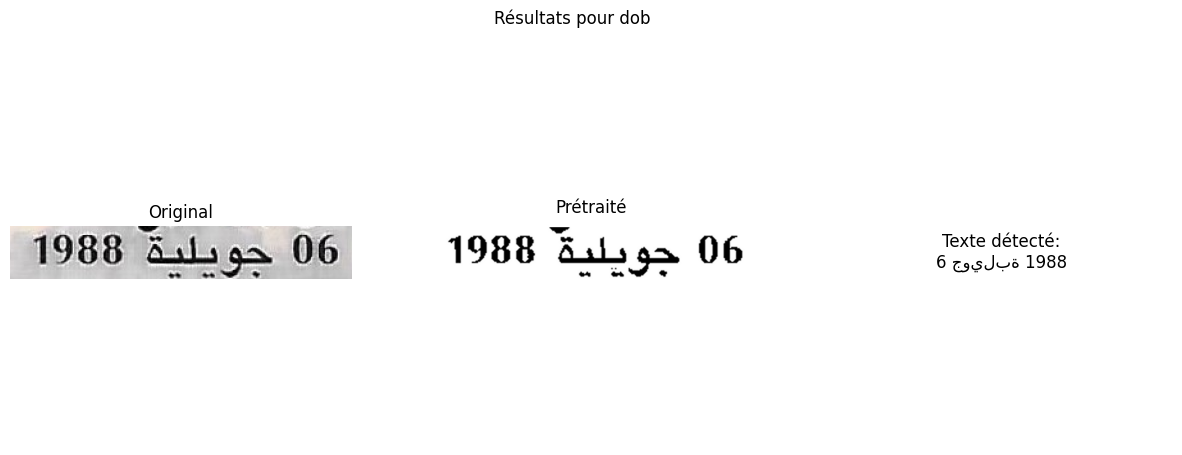


Test OCR: last_name

Essai avec Enhanced:
Config: --psm 7 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'مورالدين'
Config: --psm 6 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'مورالدين'

Essai avec Binary:
Config: --psm 7 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'مورالدين'
Config: --psm 6 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'مورالدين'

Résultat final: 'مورالدين'


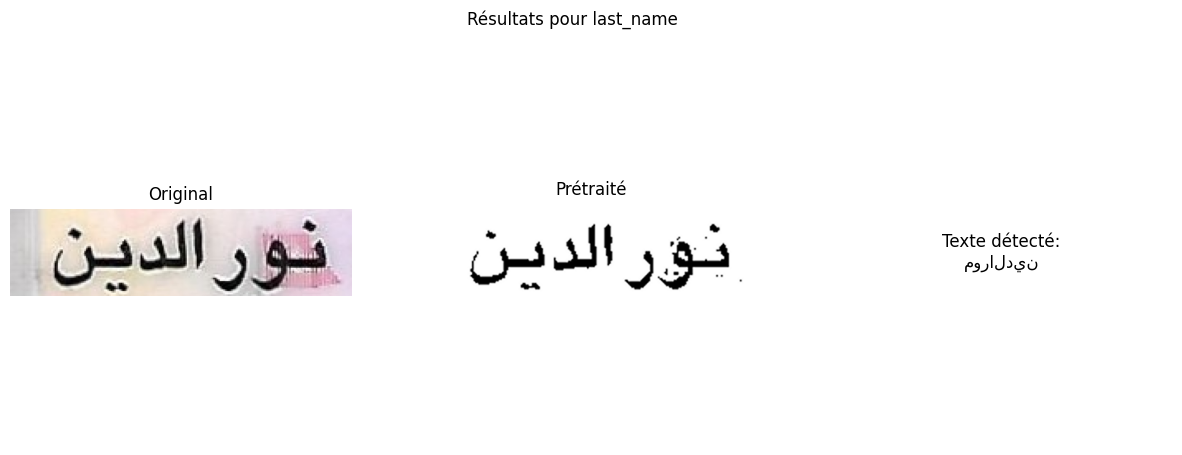


Test OCR: Id


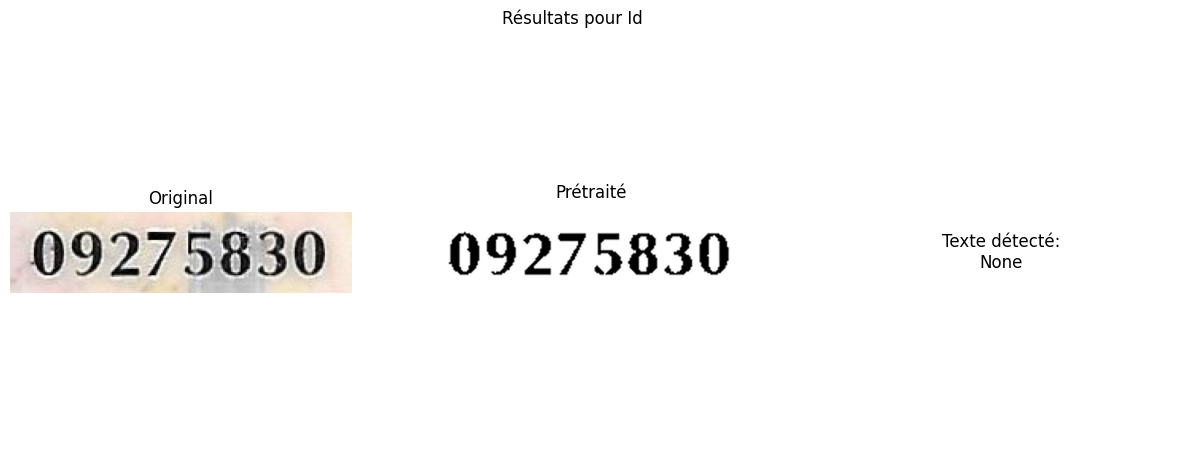


Test OCR: full_name

Essai avec Enhanced:
Config: --psm 7 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'سن الضادق دن فرج'
Config: --psm 6 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'سن الضادق دن فرج'

Essai avec Binary:
Config: --psm 7 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'سن الضادق دن فرج'
Config: --psm 6 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'سن الضادق دن فرج'

Résultat final: 'سن الضادق دن فرج'


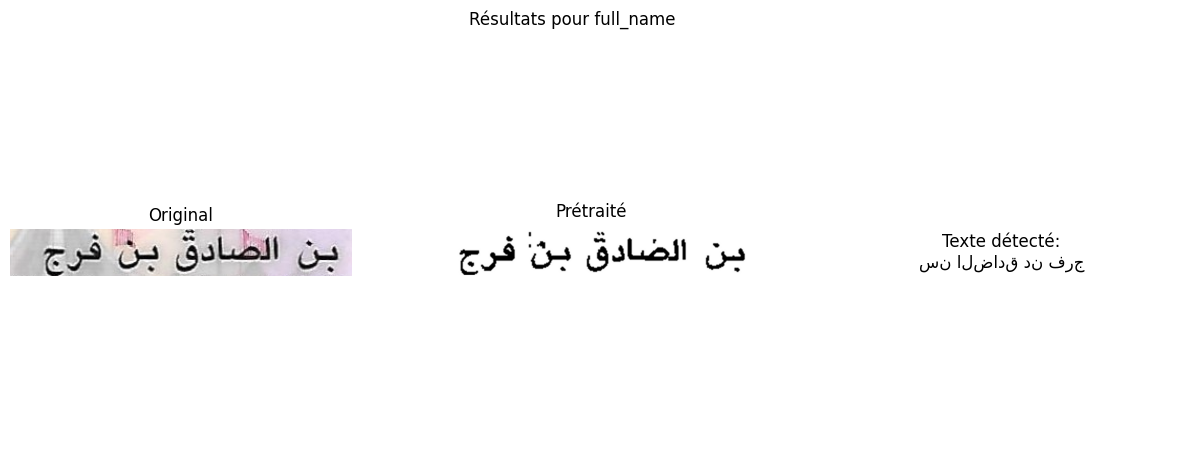


Test OCR: pob

Essai avec Enhanced:
Config: --psm 7 -l ara --dpi 300 --oem 1
Config: --psm 6 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'القلعم'

Essai avec Dilated:
Config: --psm 7 -l ara --dpi 300 --oem 1
Config: --psm 6 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'القلعم'

Résultat final: 'القلعم'


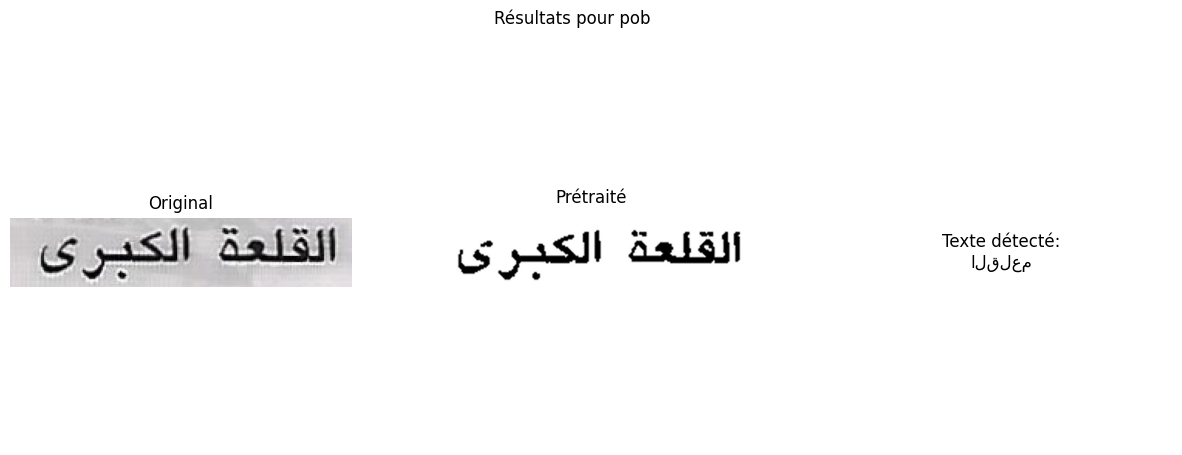


Test OCR: first_name

Essai avec Enhanced:
Config: --psm 8 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'اصدقي '
Config: --psm 7 -l ara --dpi 300 --oem 1

Essai avec Binary:
Config: --psm 8 -l ara --dpi 300 --oem 1
Résultat nettoyé: 'اصدقي '
Config: --psm 7 -l ara --dpi 300 --oem 1

Résultat final: 'اصدقي '


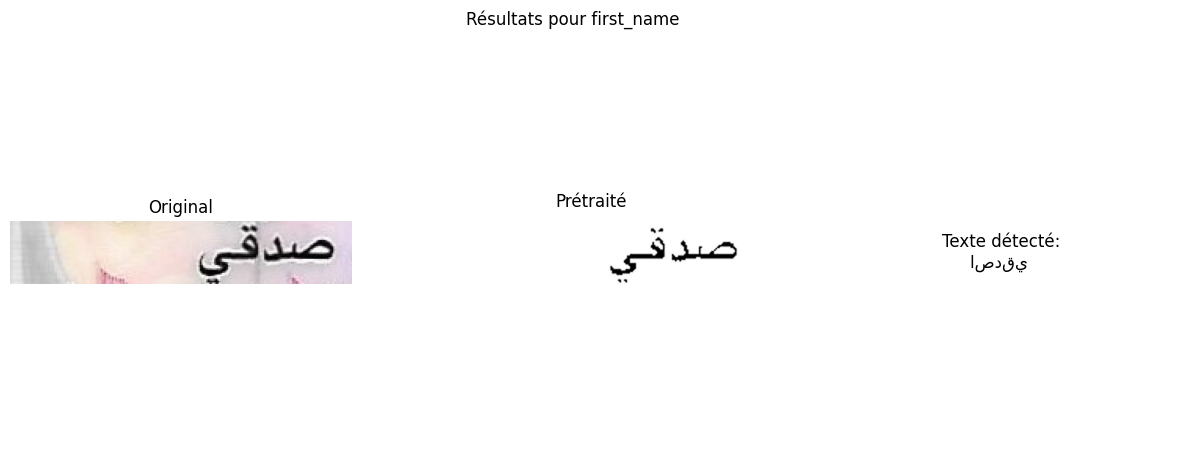


RÉSUMÉ DES RÉSULTATS:
dob:
  Texte: 6 جويلبة 1988
  Confiance: 0.78
------------------------------
last_name:
  Texte: مورالدين
  Confiance: 0.77
------------------------------
Id:
  Texte: None
  Confiance: 0.74
------------------------------
full_name:
  Texte: سن الضادق دن فرج
  Confiance: 0.69
------------------------------
pob:
  Texte: القلعم
  Confiance: 0.66
------------------------------
first_name:
  Texte: اصدقي 
  Confiance: 0.61
------------------------------


In [15]:
def test_ocr_on_cin():
    """
    Test complet de l'OCR sur une CIN
    """
    image_path = "/content/1.jpg"
    image = cv2.imread(image_path)
    results = detection_model(image)
    extracted_fields = extract_fields(results, image)

    # Stocker les résultats
    ocr_results = {}

    for field_name, field_info in extracted_fields.items():
        print(f"\n{'='*50}")
        print(f"Test OCR: {field_name}")
        print(f"{'='*50}")

        # Prétraitement
        roi = field_info['roi']
        processed = preprocess_field(roi, field_name)

        # OCR
        text = perform_ocr(processed, field_name)

        # Stocker
        ocr_results[field_name] = {
            'text': text,
            'confidence': field_info['confidence']
        }

        # Visualisation
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
        plt.title('Original')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(processed, cmap='gray')
        plt.title('Prétraité')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.text(0.5, 0.5, f"Texte détecté:\n{text}",
                ha='center', va='center', fontsize=12)
        plt.axis('off')

        plt.suptitle(f"Résultats pour {field_name}")
        plt.show()

    # Afficher résumé
    print("\nRÉSUMÉ DES RÉSULTATS:")
    print("="*50)
    for field, info in ocr_results.items():
        print(f"{field}:")
        print(f"  Texte: {info['text']}")
        print(f"  Confiance: {info['confidence']:.2f}")
        print("-"*30)

    return ocr_results

# Lancer le test
results = test_ocr_on_cin()

### easyOCR

In [17]:
reader_arabic = easyocr.Reader(['ar'])
reader_french = easyocr.Reader(['fr'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

#### **

In [16]:
def perform_ocr_with_easyocr(preprocessed_image, field_type):
    try:
        # Normalize field type to lowercase for consistent comparison
        field_type = field_type.lower()

        # Handle the 'issue' field type variant
        if field_type == 'issue':
            field_type = 'issue_date'

        # Initialize EasyOCR with appropriate language based on field type
        if field_type == 'id':
            reader = easyocr.Reader(['en'], gpu=True)
            allowlist = '0123456789'
        else:
            reader = easyocr.Reader(['ar', 'en'], gpu=True)
            allowlist = None

        # Configure parameters based on field type
        use_paragraph = field_type in ['full_name', 'dob', 'address', 'mother_name', 'issue_date']

        # Set OCR parameters
        results = reader.readtext(
            preprocessed_image,
            paragraph=use_paragraph,
            allowlist=allowlist,
            batch_size=1
        )

        print(f"Raw OCR results for {field_type}:")
        print(results)

        if not results:
            return None

        # Process based on field type
        if field_type == 'id':
            if len(results[0]) >= 2:
                text = results[0][1]
                print(f"Extracted ID text: {text}")
                print(f"Is digit check: {text.isdigit()}")
                print(f"Length check: {len(text)}")

                if text.isdigit() and len(text) == 8:
                    print(f"Valid ID found: {text}")
                    return text
                cleaned = ''.join(filter(str.isdigit, text))
                if len(cleaned) == 8:
                    print(f"Valid cleaned ID found: {cleaned}")
                    return cleaned
            return None

        elif field_type in ['dob', 'issue_date']:
            # Handle dates (both DOB and issue date)
            if len(results[0]) >= 2:
                text = results[0][1]
                # Keep both numbers and Arabic text for dates
                cleaned = re.sub(r'[^؀-ۿ0-9\s]', '', text)
                cleaned = cleaned.strip()
                print(f"Cleaned date text: {cleaned}")
                return cleaned if cleaned else None

        elif field_type == 'address':
            # Handle address with both numbers and Arabic text
            if len(results[0]) >= 2:
                text = results[0][1]
                # Keep both numbers and Arabic text for address
                cleaned = re.sub(r'[^؀-ۿ0-9\s]', '', text)
                # Split into parts and filter out invalid parts
                parts = [p.strip() for p in cleaned.split() if len(p.strip()) > 1]
                return ' '.join(parts) if parts else None

        elif field_type == 'profession':
            # Handle profession (Arabic text only)
            if len(results[0]) >= 2:
                text = results[0][1]
                cleaned = re.sub(r'[^؀-ۿ\s]', '', text)
                return cleaned.strip() if cleaned.strip() else None

        elif field_type == 'mother_name':
            # Handle mother's name
            if len(results[0]) >= 2:
                text = results[0][1]
                cleaned = re.sub(r'[^؀-ۿ\s]', '', text)
                return cleaned.strip() if cleaned.strip() else None

        elif field_type == 'pob':
            texts = [result[1] for result in results]
            cleaned_parts = []
            for text in texts:
                cleaned = re.sub(r'[^؀-ۿ\s]', '', text)
                parts = [p for p in cleaned.split() if len(p) > 1 and not p.isdigit()]
                cleaned_parts.extend(parts)
            return ' '.join(cleaned_parts) if cleaned_parts else None

        elif field_type == 'full_name':
            name_parts = []
            for result in results:
                if len(result) >= 2:
                    text = result[1]
                    cleaned = re.sub(r'[^؀-ۿ\s]', '', text)
                    if cleaned and len(cleaned.strip()) > 1:
                        name_parts.append(cleaned.strip())

            if len(results) > 1:
                sorted_results = sorted(zip(results, name_parts),
                                     key=lambda x: x[0][0][0][0])
                name_parts = [part for _, part in sorted_results]

            return ' '.join(name_parts) if name_parts else None

        elif field_type in ['first_name', 'last_name']:
            text_parts = []
            for result in results:
                if len(result) >= 3:
                    _, text, conf = result
                    if conf > 0.3:
                        cleaned = re.sub(r'[^؀-ۿ\s]', '', text)
                        if cleaned and len(cleaned.strip()) > 1:
                            text_parts.append(cleaned.strip())
                elif len(result) >= 2:
                    text = result[1]
                    cleaned = re.sub(r'[^؀-ۿ\s]', '', text)
                    if cleaned and len(cleaned.strip()) > 1:
                        text_parts.append(cleaned.strip())

            if text_parts:
                text_parts.sort(key=len, reverse=True)
                return text_parts[0]
            return None

        return None

    except Exception as e:
        print(f"Error in OCR processing: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

In [ ]:
def test_all_fields(image_path, detection_model):
    try:
        # Load image
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Could not load image from {image_path}")

        # Run YOLO detection
        results = detection_model(image)

        # Extract fields
        fields = extract_fields(results, image)

        # Process each field
        extracted_data = {}

        for field_type, field_info in fields.items():
            print(f"\n=== Processing {field_type} ===")
            roi = field_info['roi']

            # Use the improved OCR function
            text = perform_ocr_with_easyocr(roi, field_type)

            if text:
                extracted_data[field_type] = text
                print(f"Successfully extracted {field_type}: {text}")
            else:
                print(f"Failed to extract {field_type}")

        return extracted_data

    except Exception as e:
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

In [ ]:
def main():
    try:
        # Replace this with your image path
        image_path = '/content/408ac4e7-0dfa-4363-a674-abd51589490c.jpeg'  # <-- Change this to your image path

        print("\nTesting all fields:")
        results = test_all_fields(image_path, detection_model)

        if results:
            print("\nExtracted Fields:")
            print("-" * 40)
            for field_type, text in results.items():
                print(f"{field_type}: {text}")
        else:
            print("Failed to process ID card")

    except Exception as e:
        print(f"Error in main: {str(e)}")

if __name__ == "__main__":
    main()


Testing all fields:

0: 480x640 1 Id, 1 dob, 1 first_name, 1 full_name, 1 last_name, 1 pob, 7.2ms
Speed: 3.8ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

=== Processing full_name ===
Raw OCR results for full_name:
[[[[46, -13], [986, -13], [986, 117], [46, 117]], 'بنت نعمان بن الحبيب']]
Successfully extracted full_name: بنت نعمان بن الحبيب

=== Processing Id ===
Raw OCR results for id:
[([[np.int32(28), np.int32(25)], [np.int32(513), np.int32(25)], [np.int32(513), np.int32(125)], [np.int32(28), np.int32(125)]], '11165386', np.float64(0.9926514920095243))]
Extracted ID text: 11165386
Is digit check: True
Length check: 8
Valid ID found: 11165386
Successfully extracted Id: 11165386

=== Processing dob ===
Raw OCR results for dob:
[[[[43, 3], [651, 3], [651, 111], [43, 111]], '05 جوان 2002']]
Cleaned date text: 05 جوان 2002
Successfully extracted dob: 05 جوان 2002

=== Processing pob ===
Raw OCR results for pob:
[[[[np.int32(31), 0], [np.int32(508)

### PaddleOCR

#### import

In [18]:
pip install paddlepaddle paddleocr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 76.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 91.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=1eddb606d5e18567f2b0cc7b10d26c7f3e22c4974778b9a11a31f7f21d9ca878
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      S

In [19]:

!pip install opencv-python numpy arabic-reshaper python-bidi

In [20]:
from paddleocr import PaddleOCR

# Initialiser PaddleOCR une seule fois (langue arabe ou française si besoin)
ocr_model = PaddleOCR(use_angle_cls=True, lang='ar')  # ou 'fr' pour la version française


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


download https://paddleocr.bj.bcebos.com/PP-OCRv3/multilingual/Multilingual_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer/Multilingual_PP-OCRv3_det_infer.tar


100%|██████████| 3762/3762 [00:15<00:00, 236.88it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/multilingual/arabic_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/arabic/arabic_PP-OCRv4_rec_infer/arabic_PP-OCRv4_rec_infer.tar


100%|██████████| 7730/7730 [00:17<00:00, 440.12it/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:15<00:00, 137.83it/s]

[2025/05/11 13:20:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/arabic/arabic_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch

#### **

In [21]:
def test_all_fields_paddle(image_path, detection_model):
    """
    Test function that uses PaddleOCR
    """
    try:
        # Load image
        image = cv2.imread(image_path)
        if image is None:
            raise ValueError(f"Could not load image from {image_path}")

        # Run YOLO detection
        results = detection_model(image)

        # Extract fields
        fields = extract_fields(results, image)

        # Process each field
        extracted_data = {}

        for field_type, field_info in fields.items():
            print(f"\n=== Processing {field_type} with PaddleOCR ===")
            roi = field_info['roi']

            # Preprocess the ROI
            preprocessed_roi = preprocess_field(roi, field_type)

            # Use PaddleOCR
            text = perform_ocr_with_paddleocr(preprocessed_roi, field_type)

            if text:
                extracted_data[field_type] = text
                print(f"Successfully extracted {field_type}: {text}")
            else:
                print(f"Failed to extract {field_type}")

        return extracted_data

    except Exception as e:
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

In [23]:
import re

def reverse_arabic_word(word):
    """Reverse a single Arabic word."""
    return word[::-1]

def is_arabic(text):
    """Check if a word contains Arabic characters."""
    return bool(re.search(r'[؀-ۿ]', text))

def is_number(text):
    """Check if a word is a number."""
    return text.isdigit()

def process_mixed_text(text):
    """Process mixed text with Arabic and numbers, reversing only Arabic words."""
    words = text.split()
    words.reverse()  # Reverse the order of words

    # Process each word - reverse only Arabic words
    processed_words = []
    for word in words:
        if is_arabic(word):
            processed_words.append(reverse_arabic_word(word))
        else:
            processed_words.append(word)  # Keep numbers and other characters as is

    return ' '.join(processed_words)

def extract_and_sort_fields(results):
    """Extract and format OCR results."""
    text_parts = []
    for line in results:
        for result in line:
            if result[1][0]:
                text = result[1][0]
                cleaned = re.sub(r'[^؀-ۿ0-9\s]', '', text).strip()
                if cleaned:
                    text_parts.append(cleaned)

    return ' '.join(text_parts) if text_parts else None

def perform_ocr_with_paddleocr(preprocessed_image, field_type):
    try:
        # Normalize field type
        field_type = field_type.lower()
        if field_type == 'issue':
            field_type = 'issue_date'

        from paddleocr import PaddleOCR
        # Initialize PaddleOCR based on field type
        if field_type == 'id':
            ocr = PaddleOCR(use_angle_cls=True, lang='en', rec_char_dict_path=None)
        else:
            ocr = PaddleOCR(use_angle_cls=True, lang='ar', rec_char_dict_path=None)

        results = ocr.ocr(preprocessed_image, cls=True)
        print(f"Raw OCR results for {field_type}:")
        print(results)

        if not results or len(results) == 0 or not results[0]:
            return None

        if field_type == 'id':
            id_candidates = []
            for line in results:
                for result in line:
                    if result[1][0]:
                        text = result[1][0]
                        print(f"Extracted ID text: {text}")
                        if text.isdigit() and len(text) == 8:
                            return text
                        cleaned = ''.join(filter(str.isdigit, text))
                        if len(cleaned) == 8:
                            id_candidates.append(cleaned)
            return id_candidates[0] if id_candidates else None

        # Extract the raw text
        raw_text = extract_and_sort_fields(results)
        if not raw_text:
            return None

        # Handle mixed content fields (dates and address)
        if field_type in ['dob', 'issue_date', 'address']:
            return process_mixed_text(raw_text)

        # Handle pure Arabic text fields
        elif field_type in ['profession', 'mother_name', 'pob', 'full_name', 'first_name', 'last_name']:
            return process_mixed_text(raw_text)

        return raw_text

    except Exception as e:
        print(f"Error in OCR processing: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

In [24]:
def main():
    try:
        # Assurez-vous d'avoir installé PaddleOCR
        # !pip install paddlepaddle paddleocr

        # Chemin vers votre image
        image_path = '/content/1.jpg'  # <-- Change this to your image path


        print("\nTesting with PaddleOCR:")
        results_paddle = test_all_fields_paddle(image_path, detection_model)



    except Exception as e:
        print(f"Error in main: {str(e)}")

if __name__ == "__main__":
    main()


Testing with PaddleOCR:

0: 416x640 1 Id, 1 dob, 2 first_names, 1 full_name, 1 last_name, 1 pob, 9.8ms
Speed: 3.1ms preprocess, 9.8ms inference, 1.8ms postprocess per image at shape (1, 3, 416, 640)

=== Processing dob with PaddleOCR ===
[2025/05/11 13:21:02] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det

100%|██████████| 3910/3910 [00:16<00:00, 244.33it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:18<00:00, 529.58it/s]

[2025/05/11 13:21:43] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_l

[2025/05/11 13:21:44] ppocr DEBUG: dt_boxes num : 1, elapsed : 0.04421091079711914
[2025/05/11 13:21:44] ppocr DEBUG: cls num  : 1, elapsed : 0.028885841369628906
[2025/05/11 13:21:44] ppocr DEBUG: rec_res num  : 1, elapsed : 0.08284139633178711
Raw OCR results for id:
[[[[[43.0, 38.0], [402.0, 38.0], [402.0, 87.0], [43.0, 87.0]], ('09275830', 0.9994906783103943)]]]
Extracted ID text: 09275830
Successfully extracted Id: 09275830

=== Processing full_name with PaddleOCR ===
[2025/05/11 13:21:44] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_d

### version

In [ ]:
!pip freeze | grep easyocr
!pip freeze | grep opencv
!pip freeze | grep torch


easyocr==1.7.2
opencv-contrib-python==4.11.0.86
opencv-python==4.11.0.86
opencv-python-headless==4.11.0.86
torch @ https://download.pytorch.org/whl/cu124/torch-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl
torchaudio @ https://download.pytorch.org/whl/cu124/torchaudio-2.6.0%2Bcu124-cp311-cp311-linux_x86_64.whl
torchsummary==1.5.1
torchvision @ https://download.pytorch.org/whl/cu124/torchvision-0.21.0%2Bcu124-cp311-cp311-linux_x86_64.whl
